# 데이터 가공, 시각화

In [1]:
import pandas as pd

eq = pd.read_csv('./kor_earthquake_new.csv', encoding='utf-8')

In [2]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         2429 non-null   int64  
 1   Date       2429 non-null   object 
 2   Magnitude  2429 non-null   float64
 3   Latitude   2429 non-null   float64
 4   Longitude  2429 non-null   float64
 5   Pos        2429 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 114.0+ KB


In [3]:
eq.head()

,No,Date,Magnitude,Latitude,Longitude,Pos
0,1,1978.8.30 2:29,4.5,39.1,124.2,북한 평안북도 철산 남남서쪽 84km 해역
1,2,1978.9.16 2:07,5.2,36.6,127.9,경북 상주시 북서쪽 32km 지역
2,3,1978.10.7 18:19,5.0,36.6,126.7,충남 홍성군 동쪽 3km 지역
3,4,1978.11.23 11:06,4.6,38.4,125.6,북한 황해남도 안악 남동쪽 15km 지역
4,5,1978.12.4 15:16,2.8,37.4,128.7,강원 정선군 북동쪽 4km 지역


In [4]:
eq.describe()

,No,Magnitude,Latitude,Longitude
count,2429.000000,2429.000000,2429.000000,2429.000000
mean,1236.811033,2.304199,36.497332,127.596427
std,703.293508,0.770950,1.459391,1.674921
min,1.000000,0.400000,32.350000,122.800000
25%,631.000000,2.000000,35.760000,126.160000
50%,1238.000000,2.300000,36.230000,127.750000
75%,1845.000000,2.700000,37.380000,129.180000
max,2452.000000,5.800000,41.600000,131.100000


In [5]:
# 북한데이터 제거
index_buk = eq[eq['Pos'].str.split(' ').str[0] == '북한'].index
eq_no_buk = eq.drop(index_buk)
eq_no_buk.reset_index(drop=True,inplace=True)
eq_data = eq_no_buk

In [6]:
# # 진도 3 이상
# index_3 = eq[eq['Magnitude'] < 3.0].index
# eq_more_3 = eq.drop(index_3)
# eq_more_3.reset_index(drop=True, inplace=True)
# eq_data = eq_more_3

In [7]:
# # 북한데이터 제거, 진도 3 이상
# index_buk = eq[eq['Pos'].str.split(' ').str[0] == '북한'].index
# eq_no_buk = eq.drop(index_buk)
# index_3 = eq_no_buk[eq_no_buk['Magnitude'] < 3.0].index
# eq_no_buk_and_more_3 = eq_no_buk.drop(index_3)
# eq_no_buk_and_more_3.reset_index(drop=True, inplace=True)
# eq_data = eq_no_buk_and_more_3

In [8]:
eq_data

,No,Date,Magnitude,Latitude,Longitude,Pos
0,2,1978.9.16 2:07,5.2,36.60,127.90,경북 상주시 북서쪽 32km 지역
1,3,1978.10.7 18:19,5.0,36.60,126.70,충남 홍성군 동쪽 3km 지역
2,5,1978.12.4 15:16,2.8,37.40,128.70,강원 정선군 북동쪽 4km 지역
3,6,1978.12.12 21:58,3.3,35.90,126.30,전북 군산시 서남서쪽 38km 해역
4,7,1979.1.1 0:11,2.9,36.60,126.70,충남 홍성군 동쪽 3km 지역
...,...,...,...,...,...,...
2051,2448,2019.8.18 15:38,1.4,36.54,129.63,경북 영덕군 동북동쪽 27km 해역
2052,2449,2019.8.18 15:48,1.5,36.54,129.63,경북 영덕군 동북동쪽 27km 해역
2053,2450,2019.8.18 18:06,1.3,36.53,129.65,경북 영덕군 동북동쪽 28km 해역
2054,2451,2019.8.19 0:22,1.2,36.53,129.63,경북 영덕군 동북동쪽 27km 해역


In [9]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# latitude = []
# longitude = []

# for i in range(len(eq)):
#     latitude.append(eq['Latitude'][i])
#     longitude.append(eq['Longitude'][i])
    
# plt.figure(figsize=(5,10))
# plt.scatter(latitude, longitude, s=eq['Magnitude']**3)
# plt.show()

In [10]:
import folium

In [11]:
position  = []

for i in range(len(eq_data)):
    position.append((eq_data['Latitude'][i], eq_data['Longitude'][i]))

In [12]:
m = folium.Map(location=[36, 128], zoom_start=7, tiles = 'Cartodb Positron')

for i in range(len(position)):
    folium.Circle(
    location = position[i],
        radius = eq_data['Magnitude'][i]**5,
        color = 'deeppink',
        fill = True
    ).add_to(m)
m

In [13]:
from folium.plugins import HeatMap

HeatMap(position).add_to(m)
m

# 데이터 분석(군집화)

## 군집화 시각화

In [14]:
eq_cluster = eq_data[['Longitude', 'Latitude', 'Magnitude']]
eq_cluster

,Longitude,Latitude,Magnitude
0,127.90,36.60,5.2
1,126.70,36.60,5.0
2,128.70,37.40,2.8
3,126.30,35.90,3.3
4,126.70,36.60,2.9
...,...,...,...
2051,129.63,36.54,1.4
2052,129.63,36.54,1.5
2053,129.65,36.53,1.3
2054,129.63,36.53,1.2


In [15]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=156).fit(eq_cluster)
eq_cluster['cluster'] = kmeans.labels_
eq_cluster.head()

,Longitude,Latitude,Magnitude,cluster
0,127.9,36.6,5.2,0
1,126.7,36.6,5.0,2
2,128.7,37.4,2.8,0
3,126.3,35.9,3.3,2
4,126.7,36.6,2.9,2


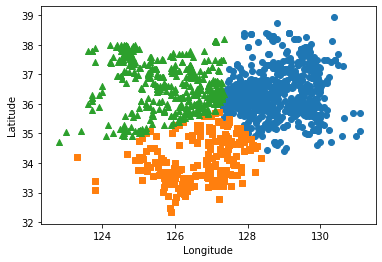

In [18]:
# 데이터 : 좌표

marker0 = eq_cluster[eq_cluster['cluster']==0].index
marker1 = eq_cluster[eq_cluster['cluster']==1].index
marker2 = eq_cluster[eq_cluster['cluster']==2].index

plt.scatter(x=eq_cluster.loc[marker0, 'Longitude'], y=eq_cluster.loc[marker0, 'Latitude'], marker='o')
plt.scatter(x=eq_cluster.loc[marker1, 'Longitude'], y=eq_cluster.loc[marker1, 'Latitude'], marker='s')
plt.scatter(x=eq_cluster.loc[marker2, 'Longitude'], y=eq_cluster.loc[marker2, 'Latitude'], marker='^')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

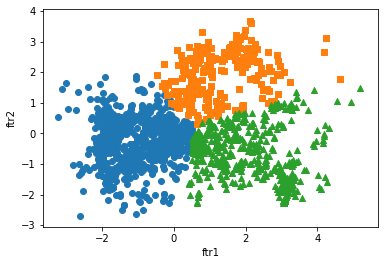

In [19]:
# 데이터 : 좌표 + 진도, 차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(eq_cluster[['Latitude', 'Longitude', 'Magnitude']])

eq_cluster['ftr1'] = pca_transformed[:, 0]
eq_cluster['ftr2'] = pca_transformed[:, 1]
eq_cluster.head()

marker0 = eq_cluster[eq_cluster['cluster']==0].index
marker1 = eq_cluster[eq_cluster['cluster']==1].index
marker2 = eq_cluster[eq_cluster['cluster']==2].index

plt.scatter(x=eq_cluster.loc[marker0, 'ftr1'], y=eq_cluster.loc[marker0, 'ftr2'], marker='o')
plt.scatter(x=eq_cluster.loc[marker1, 'ftr1'], y=eq_cluster.loc[marker1, 'ftr2'], marker='s')
plt.scatter(x=eq_cluster.loc[marker2, 'ftr1'], y=eq_cluster.loc[marker2, 'ftr2'], marker='^')

plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

In [20]:
region0 = eq_cluster[eq_cluster['cluster']==0]
region0.mean()

Longitude    128.979936
Latitude      36.242700
Magnitude      2.183147
cluster        0.000000
ftr1          -1.135533
ftr2          -0.137288
dtype: float64

In [21]:
region1 = eq_cluster[eq_cluster['cluster']==1]
region1.mean()

Longitude    126.709283
Latitude      34.056523
Magnitude      2.424731
cluster        1.000000
ftr1           1.214440
ftr2           1.966914
dtype: float64

In [22]:
region2 = eq_cluster[eq_cluster['cluster']==2]
region2.mean()

Longitude    125.766838
Latitude      36.722800
Magnitude      2.312381
cluster        2.000000
ftr1           2.062587
ftr2          -0.717875
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X2 = eq_cluster[['Longitude', 'Latitude']]
X3 = eq_cluster[['Longitude', 'Latitude', 'Magnitude']]
y = eq_cluster['cluster']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=156)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("dt_clf accuracy : ", accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("rf_clf accuracy : ", accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("lr_clf accuracy : ", accuracy_score(y_test, lr_pred))

dt_clf accuracy :  0.9975728155339806
rf_clf accuracy :  0.9975728155339806
lr_clf accuracy :  0.9902912621359223


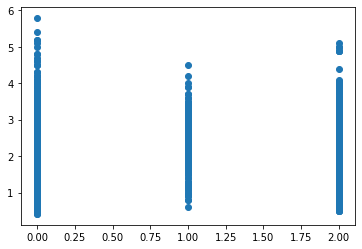

In [24]:
plt.scatter(x=eq_cluster['cluster'], y=eq_cluster['Magnitude'])
plt.show()